# Lab 7: Neural networks 

In this lab we will build dense neural networks on the MNIST dataset.

Make sure you read the tutorial for this lab first.

## Load the data and create train-test splits

In [1]:
# Global imports and settings
%matplotlib inline
import numpy as np
import pandas as pd
import openml as oml
import os
import matplotlib.pyplot as plt
import tensorflow.keras as keras
print("Using Keras",keras.__version__)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = "2"

Using Keras 2.7.0


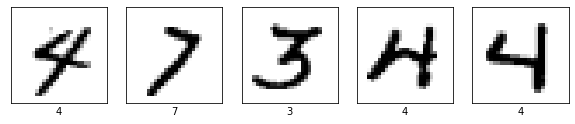

In [2]:
# Download MNIST data. Takes a while the first time.
mnist = oml.datasets.get_dataset(554)
X, y, _, _ = mnist.get_data(target=mnist.default_target_attribute, dataset_format='array');
X = X.reshape(70000, 28, 28)

# Take some random examples
from random import randint
fig, axes = plt.subplots(1, 5,  figsize=(10, 5))
for i in range(5):
    n = randint(0,70000)
    axes[i].imshow(X[n], cmap=plt.cm.gray_r)
    axes[i].set_xticks([])
    axes[i].set_yticks([])
    axes[i].set_xlabel("{}".format(y[n]))
plt.show();

In [3]:
# For MNIST, there exists a predefined stratified train-test split of 60000-10000. We therefore don't shuffle or stratify here.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=60000, random_state=0)

## Exercise 1: Preprocessing
* Normalize the data: map each feature value from its current representation (an integer between 0 and 255) to a floating-point value between 0 and 1.0. 
* Store the floating-point values in `x_train_normalized` and `x_test_normalized`.
* Map the class label to a on-hot-encoded value. Store in `y_train_encoded` and `y_test_encoded`.

In [4]:
# Solution
x_train_normalized = X_train / 255.0
x_test_normalized = X_test / 255.0

from tensorflow.keras.utils import to_categorical
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

## Exercise 2: Create a deep neural net model

Implement a `create_model` function which defines the topography of the deep neural net, specifying the following:

* The number of layers in the deep neural net: Use 2 dense layers for now.
* The number of nodes in each layer: these are parameters of your function.
* Any regularization layers. Add at least one dropout layer.
* The optimizer and learning rate. Make the learning rate a parameter of your function as well.

Consider:
* What should be the shape of the input layer?
* Which activation function you will need for the last layer, since this is a 10-class classification problem?

In [5]:
### Create and compile a 'deep' neural net
def create_model(layer_1_units=32, layer_2_units=10, learning_rate=0.001, dropout_rate=0.3):
    pass

In [6]:
# Solution
def create_model(layer_1_units=32, layer_2_units=10, learning_rate=0.001, dropout_rate=0.3):

    model = keras.models.Sequential()

    # The features are stored in a two-dimensional 28X28 array. 
    # Flatten that two-dimensional array into a a one-dimensional 
    # 784-element array.
    model.add(keras.layers.Flatten(input_shape=(28, 28)))

    # Define the first hidden layer.   
    model.add(keras.layers.Dense(units=32, activation='relu'))

    # Define a dropout regularization layer. 
    model.add(keras.layers.Dropout(rate=dropout_rate))

    # Define the output layer. The units parameter is set to 10 because
    # the model must choose among 10 possible output values (representing
    # the digits from 0 to 9, inclusive).
    model.add(keras.layers.Dense(units=10, activation='softmax'))     

    # Construct the layers into a model that TensorFlow can execute.  
    # Notice that the loss function for multi-class classification
    # is different than the loss function for binary classification.
    # Using Adam here. RMSProp would also be fine
    model.compile(optimizer=keras.optimizers.Adam(lr=learning_rate),
                  loss="categorical_crossentropy", metrics=['accuracy'])

    return model       

## Exercise 3: Create a training function
Implement a `train_model` function which trains and evaluates a given model.
It should do a train-validation split and report the train and validation loss and accuracy, and return the training history.

In [7]:
def train_model(model, X, y, validation_split=0.1, epochs=10, batch_size=None):
    """
    model: the model to train
    X, y: the training data and labels
    validation_split: the percentage of data set aside for the validation set
    epochs: the number of epochs to train for
    batch_size: the batch size for minibatch SGD
    """
    pass

In [8]:
# Solution
def train_model(model, X, y, validation_split=0.1, epochs=10, batch_size=None):
    """
    model: the model to train
    X, y: the training data and labels
    validation_split: the percentage of data set aside for the validation set
    epochs: the number of epochs to train for
    batch_size: the batch size for minibatch SGD
    """
    X_train, x_val, y_train, y_val = train_test_split(X, y, test_size=validation_split, shuffle=True, stratify=y, random_state=0)
    
    history = model.fit(x=X_train, y=y_train, batch_size=batch_size, verbose=0,
                        epochs=epochs, shuffle=True, validation_data=(x_val, y_val))
    return history 

## Exercise 4: Evaluate the model

Train the model with a learning rate of 0.003, 50 epochs, batch size 4000, and a validation set that is 20% of the total training data.
Use default settings otherwise. Plot the learning curve of the loss, validation loss, accuracy, and validation accuracy. Finally, report the performance on the test set.

Feel free to use the plotting function below, or implement the callback from the tutorial to see results in real time.

In [9]:
# Helper plotting function
#
# history: the history object returned by the fit function
# list_of_metrics: the metrics to plot
def plot_curve(history, list_of_metrics):
    
    plt.figure()
    plt.xlabel("Epoch")
    plt.ylabel("Value")

    epochs = history.epoch
    hist = pd.DataFrame(history.history)

    for m in list_of_metrics:
        x = hist[m]
        plt.plot(epochs[1:], x[1:], label=m, lw=2)

    plt.legend()

Metal device set to: Apple M1 Pro


/Users/jvanscho/miniforge3/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)



 Evaluation on the test set [loss, accuracy]:


[0.21780921518802643, 0.9358000159263611]

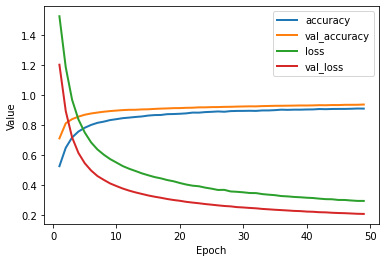

In [10]:
# Solution
# Settings
learning_rate = 0.003
epochs = 50
batch_size = 4000
validation_split = 0.2

# Create the model the model's topography.
model = create_model(learning_rate)

# Train the model on the normalized training set.
history = train_model(model, x_train_normalized, y_train_encoded, 
                      validation_split, epochs, batch_size)

# Plot a graph of the metric vs. epochs.
list_of_metrics = ['accuracy','val_accuracy','loss','val_loss']
plot_curve(history, list_of_metrics)

# Evaluate against the test set.
print("\n Evaluation on the test set [loss, accuracy]:")
model.evaluate(x=x_test_normalized, y=y_test_encoded, 
               batch_size=batch_size, verbose=0)

## Exercise 5: Optimize the model

Try to optimize the model, either manually or with a tuning method. At least optimize the following:
* the number of hidden layers 
* the number of nodes in each layer
* the amount of dropout layers and the dropout rate

Try to reach at least 96% accuracy against the test set.

/Users/jvanscho/miniforge3/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)



 Evaluation on the test set (accuracy):


0.9571000337600708

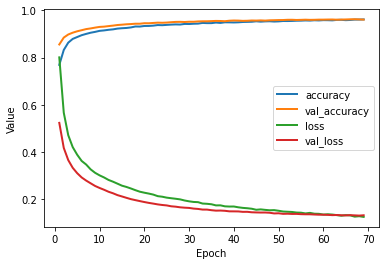

In [11]:
# Solution
# For an example with random search, see the tutorial
# Here, we search manually, following the following hunches:
#   * Adding more nodes to the first hidden layer will improve accuracy. The input size is 784, so we should not make it too small
#   * Adding a second hidden layer generally improves accuracy.
#   * For larger models (more nodes), we need to regularize more (more dropout)

batch_size = 4000 # Pretty high, but making this smaller doesn't seem to help much.
epochs = 70

# Create the model the model's topography.
model = create_model(layer_1_units=800, layer_2_units=800, learning_rate=0.003, dropout_rate= 0.15)

# Train the model on the normalized training set.
history = train_model(model, x_train_normalized, y_train_encoded, 
                      validation_split, epochs, batch_size)

# Plot a graph of the metric vs. epochs.
list_of_metrics = ['accuracy','val_accuracy','loss','val_loss']
plot_curve(history, list_of_metrics)

# Evaluate against the test set.
print("\n Evaluation on the test set (accuracy):")
model.evaluate(x=x_test_normalized, y=y_test_encoded, 
               batch_size=batch_size, verbose=0)[1]

In [ ]:
# Solution with tuning. Takes a long time, and the best found solution isn't better.
# The maximum number of nodes was set to 265. Setting it higher may yield better result.

from tensorflow.keras import optimizers
import keras_tuner as kt


def build_model(hp):
    model = keras.models.Sequential()

    # Tune the number of units in the dense layers
    hp_units = hp.Int('units', min_value = 32, max_value = 265, step = 32)
    hp_units2 = hp.Int('units2', min_value = 32, max_value = 265, step = 32)
    hp_dropout = hp.Float('dropout', min_value = 0.1, max_value = 0.5, step = 0.1)

    model.add(keras.layers.Flatten(input_shape=(28, 28)))
    model.add(keras.layers.Dense(units = hp_units, activation = 'relu'))
    model.add(keras.layers.Dropout(rate= hp_dropout))
    model.add(keras.layers.Dense(units = hp_units2, activation = 'relu'))
    model.add(keras.layers.Dense(10))

    model.compile(optimizer = 'rmsprop',
                  loss = 'categorical_crossentropy',
                  metrics = ['accuracy'])
    return model

tuner = kt.RandomSearch(build_model, max_trials=5, objective = 'val_accuracy', project_name='mnist_tuning')

X_train, x_val, y_train, y_val = train_test_split(x_train_normalized, y_train_encoded, test_size=0.1, shuffle=True, stratify=y_train_encoded, random_state=0)
tuner.search(x=X_train, y=y_train, epochs = 50, validation_data = (x_val, y_val), verbose=0)

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials = 1)[0]